In [1]:
import os
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("E:\Python for MLAI\JIGSAW\Projects\Project 5")

#### Problem Statement

It is a classification problem where we have to predict whether a loan would be approved or not. 

In [143]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#### Hypothesis Generation

Salary: Applicants with high income should have more chances of loan approval.

Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loan for less time period and less amount should have higher chances of approval.

EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [90]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [92]:
train.shape

(614, 13)

In [93]:
test.shape

(367, 12)

Variable: Description

Loan_ID: Unique Loan ID

Gender: Male/ Female

Married:Applicant married (Y/N)

Dependents: Number of dependents

Education: Applicant Education (Graduate/ Under Graduate)

Self_Employed:Self employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount: Loan amount in thousands

Loan_Amount_Term: Term of loan in months

Credit_History: credit history meets guidelines

Property_Area: Urban/ Semi Urban/ Rural

Loan_Status: Loan approved (Y/N)

In [94]:
train_1=train.copy()
test_1=test.copy()

In [95]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [96]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [97]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [98]:
train.shape, test.shape

((614, 13), (367, 12))

In [99]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [100]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

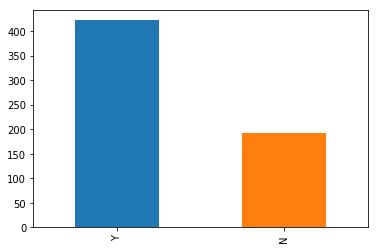

In [101]:
train['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

In [102]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Independent Variable (Categorical)

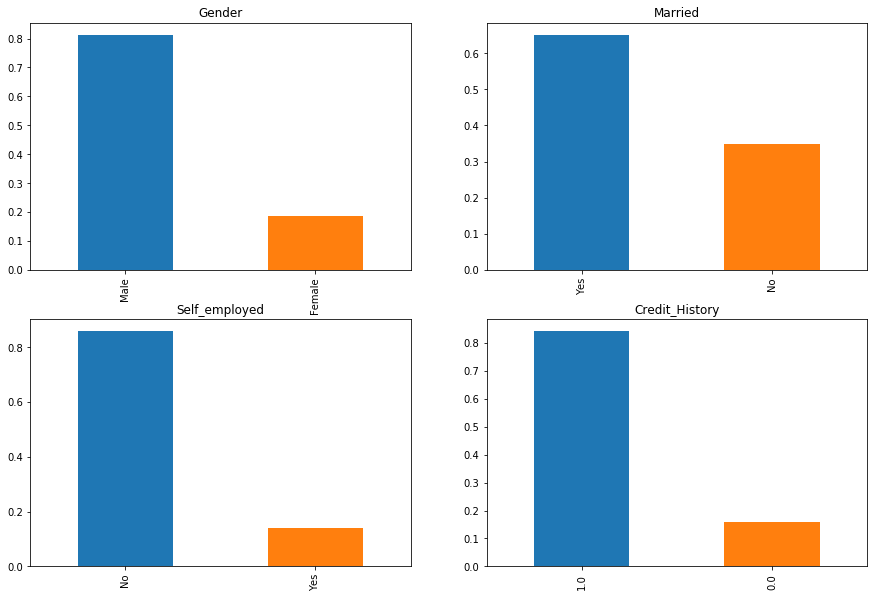

In [149]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

#### Independent Variable (Ordinal)

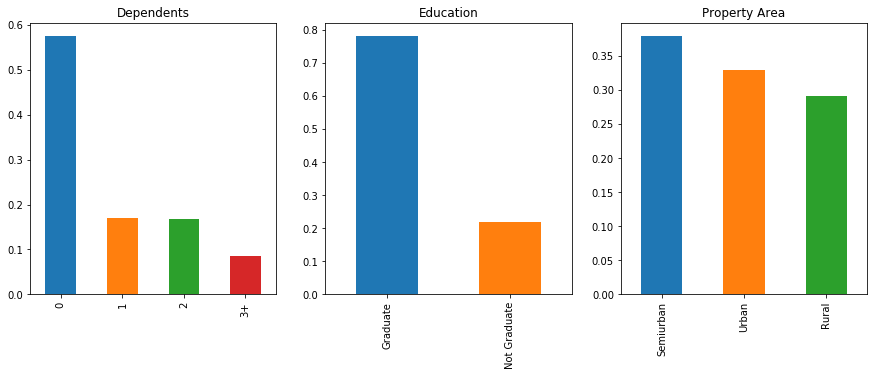

In [150]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

#### Independent Variable (Numerical)

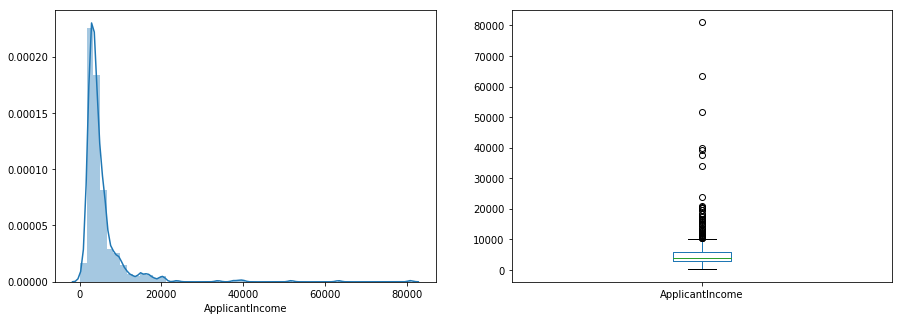

In [151]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot(kind='box',figsize=(15,5))

Text(0.5, 0.98, ' ')

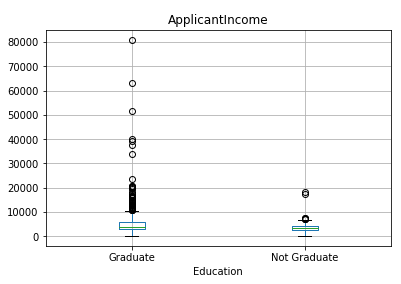

In [152]:
train.boxplot(column='ApplicantIncome',by="Education") 
plt.suptitle(" ")

In [153]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'loanamt_bin'],
      dtype='object')

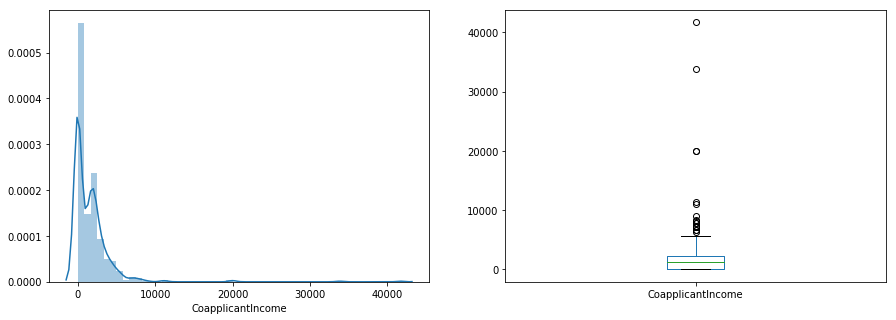

In [154]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot(kind='box',figsize=(15,5))

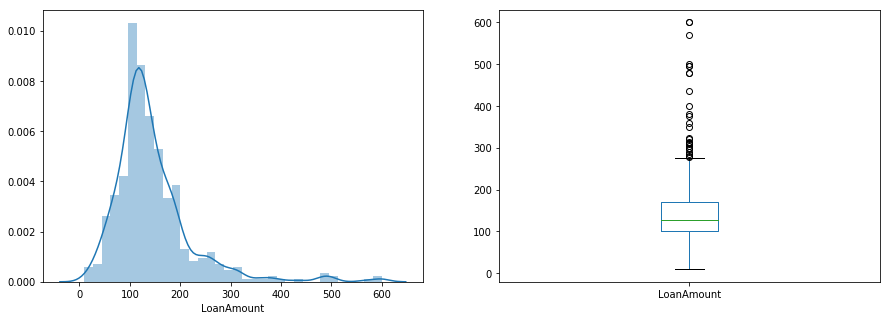

In [155]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot(kind='box',figsize=(15,5))

#### Categorical Independent Variable vs Target Variable

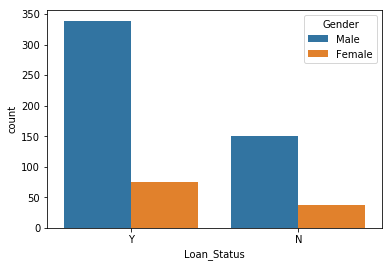

In [156]:
sns.countplot(x='Loan_Status',hue='Gender',data=train)

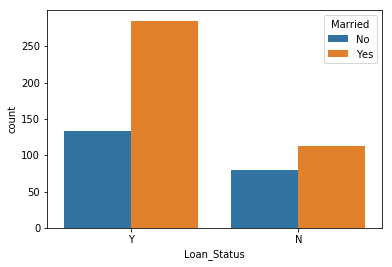

In [157]:
sns.countplot(x='Loan_Status',hue='Married',data=train)

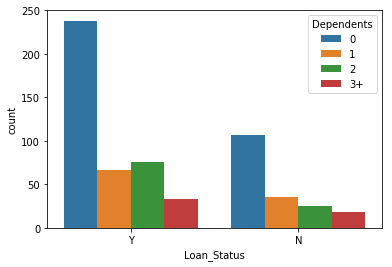

In [158]:
sns.countplot(x='Loan_Status',hue='Dependents',data=train)
plt.show()

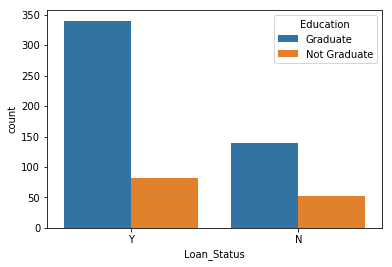

In [159]:
sns.countplot(x='Loan_Status',hue='Education',data=train)

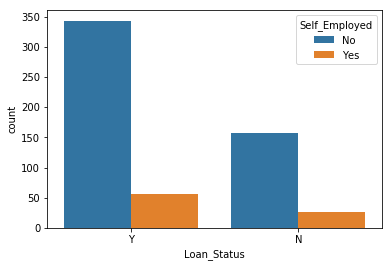

In [160]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=train)

In [161]:
train['ApplicantIncome'].quantile(np.arange(0,1,0.1))

0.0     150.0
0.1    2216.1
0.2    2605.4
0.3    3050.4
0.4    3406.8
0.5    3812.5
0.6    4343.6
0.7    5185.6
0.8    6252.4
0.9    9459.9
Name: ApplicantIncome, dtype: float64

In [162]:
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train['income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [163]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamt_bin,income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,average,high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,low,average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,average,high


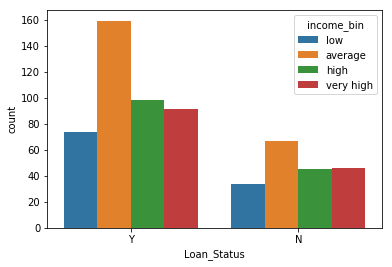

In [164]:
sns.countplot(x='Loan_Status',hue='income_bin', data=train)

In [165]:
train['LoanAmount'].quantile(np.arange(0,1,0.1))

0.0      9.0
0.1     71.0
0.2     95.0
0.3    108.0
0.4    116.0
0.5    128.0
0.6    137.0
0.7    158.0
0.8    182.0
0.9    235.8
Name: LoanAmount, dtype: float64

In [166]:
train['LoanAmount'].max()

700.0

In [167]:
bins=[0,100,200,700]
group=['low','average','high']
train['loanamt_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

In [168]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanamt_bin,income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,average,high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,low,average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,average,high


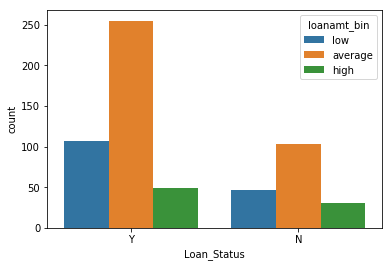

In [169]:
sns.countplot(x='Loan_Status',hue='loanamt_bin',data=train)

In [170]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'loanamt_bin', 'income_bin'],
      dtype='object')

In [171]:
train=train.drop(['income_bin', 'loanamt_bin'],axis=1)

In [181]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [180]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])

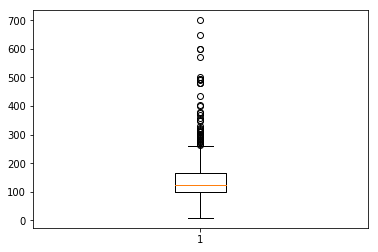

In [185]:
plt.boxplot(train['LoanAmount']);

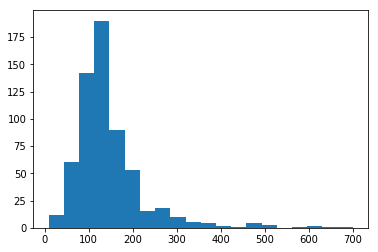

In [191]:
plt.hist(train['LoanAmount'],bins=20);

In [188]:
train['LoanAmount_log']=np.log(train['LoanAmount'])

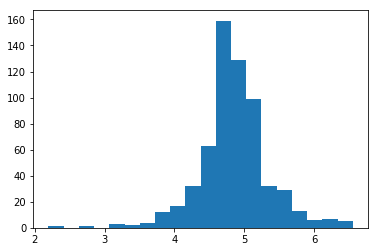

In [192]:
plt.hist(train['LoanAmount_log'],bins=20);

<img src="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/4a8/08f/c76/1549257180501.jpg">

-True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
-True Negative - Targets which are actually false(N) and we have predicted them false(N)
-False Positive - Targets which are actually false(N) but we have predicted them true(T)
-False Negative - Targets which are actually true(T) but we have predicted them false(N)

<img src="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/e17/3a8/ae9/1549257180560.jpg">

In [193]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [194]:
train=train.drop('Loan_ID',axis=1)

In [195]:
test=test.drop('Loan_ID',axis=1)

In [199]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [200]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,4.787492
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [201]:
x=pd.get_dummies(x,drop_first=True)

In [204]:
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.20,random_state=200)

In [208]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [209]:
model=LogisticRegression()
model=model.fit(x_train,y_train)

In [210]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [232]:
metrics.accuracy_score(y_test,model.predict(x_test))

0.7886178861788617

In [234]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 15)
(123, 15)
(491,)
(123,)


In [235]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
443,37719,0.0,152.0,360.0,1.0,5.023881,1,0,1,0,0,0,0,1,0
196,8333,3750.0,187.0,360.0,1.0,5.231109,1,0,0,0,0,0,0,0,0
470,3450,2079.0,162.0,360.0,1.0,5.087596,1,1,1,0,0,0,1,1,0
389,5488,0.0,125.0,360.0,1.0,4.828314,1,1,0,0,0,0,0,0,0
126,23803,0.0,370.0,360.0,1.0,5.913503,1,1,0,0,1,0,0,0,0


#### Using Decission Tree Models

In [237]:
import sklearn.tree as tree
clf=DecisionTreeClassifier(max_depth=3,random_state=100)
clf=clf.fit(x_train,y_train)

In [238]:
clf.score(x_test,y_test)

0.7886178861788617

In [239]:
metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.7136222910216719

In [240]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod=mod.fit(x_train,y_train)

In [241]:
mod.best_params_

{'max_depth': 2}

In [245]:
clf=DecisionTreeClassifier(max_depth=2,random_state=100)
clf=clf.fit(x_train,y_train)

In [247]:
clf.score(x_test,y_test)

0.7886178861788617

In [248]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [249]:
mod.best_score_

0.8105906313645621

#### Ensemble models
-Bagged Tree

In [251]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [252]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=30,oob_score=True,n_jobs=-1,random_state=200)
clf=clf.fit(x_train,y_train)

In [253]:
clf.score(x_test,y_test)

0.7886178861788617

In [254]:
clf.oob_score_

0.7657841140529531

In [255]:
for w in range(10,300,20):
    clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=w,n_jobs=-1,oob_score=True,random_state=200)
    clf=clf.fit(x_train,y_train)
    oob_score=clf.oob_score_
    print("for n_estimator "+str(w))
    print('oob score is '+str(oob_score))
    print("**************************************")

for n_estimator 10
oob score is 0.6904276985743381
**************************************
for n_estimator 30
oob score is 0.7657841140529531
**************************************
for n_estimator 50
oob score is 0.7759674134419552
**************************************
for n_estimator 70
oob score is 0.780040733197556
**************************************
for n_estimator 90
oob score is 0.7861507128309573
**************************************
for n_estimator 110
oob score is 0.780040733197556
**************************************
for n_estimator 130
oob score is 0.7780040733197556
**************************************
for n_estimator 150
oob score is 0.7718940936863544
**************************************
for n_estimator 170
oob score is 0.7780040733197556
**************************************
for n_estimator 190
oob score is 0.7739307535641547
**************************************
for n_estimator 210
oob score is 0.7739307535641547
**************************************
for n_

In [274]:
clf=BaggingClassifier(oob_score=True,base_estimator=DecisionTreeClassifier(),n_jobs=-1,n_estimators=30,random_state=200)
clf=clf.fit(x_train,y_train)

In [275]:
clf.score(x_test,y_test)

0.7886178861788617

In [278]:
clf.estimators_[0].feature_importances_

array([0.20664715, 0.14895635, 0.08891832, 0.03543631, 0.33507259,
       0.063916  , 0.00806081, 0.02148751, 0.01525134, 0.00831505,
       0.02618041, 0.01272182, 0.01105482, 0.0083361 , 0.00964541])

In [280]:
feature_importance=pd.Series(clf.estimators_[0].feature_importances_,index=x.columns.tolist())

In [281]:
feature_importance.sort_values(ascending=False)

Credit_History             0.335073
ApplicantIncome            0.206647
CoapplicantIncome          0.148956
LoanAmount                 0.088918
LoanAmount_log             0.063916
Loan_Amount_Term           0.035436
Dependents_3+              0.026180
Married_Yes                0.021488
Dependents_1               0.015251
Education_Not Graduate     0.012722
Self_Employed_Yes          0.011055
Property_Area_Urban        0.009645
Property_Area_Semiurban    0.008336
Dependents_2               0.008315
Gender_Male                0.008061
dtype: float64

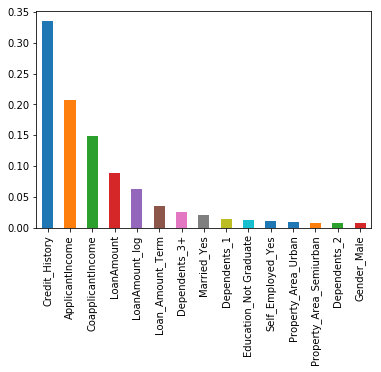

In [283]:
feature_importance.sort_values(ascending=False).plot(kind='bar');

In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [285]:
clf=RandomForestClassifier(n_estimators=30,oob_score=True,n_jobs=-1,random_state=2000)
clf=clf.fit(x_train,y_train)

In [287]:
clf.score(x_test,y_test)

0.7642276422764228

In [288]:
clf.oob_score_

0.769857433808554

In [289]:
for w in range(10,300,20):
    clf=RandomForestClassifier(oob_score=True,n_estimators=w,n_jobs=-1,random_state=200)
    clf=clf.fit(x_train,y_train)
    oob_score=clf.oob_score_
    print("for n_estimator "+str(w))
    print('oob score is '+str(oob_score))
    print("**************************************")   

for n_estimator 10
oob score is 0.7169042769857433
**************************************
for n_estimator 30
oob score is 0.7861507128309573
**************************************
for n_estimator 50
oob score is 0.7983706720977597
**************************************
for n_estimator 70
oob score is 0.7881873727087576
**************************************
for n_estimator 90
oob score is 0.7983706720977597
**************************************
for n_estimator 110
oob score is 0.7983706720977597
**************************************
for n_estimator 130
oob score is 0.7942973523421588
**************************************
for n_estimator 150
oob score is 0.8004073319755601
**************************************
for n_estimator 170
oob score is 0.8044806517311609
**************************************
for n_estimator 190
oob score is 0.8004073319755601
**************************************
for n_estimator 210
oob score is 0.7983706720977597
**************************************
for 

In [290]:
clf=RandomForestClassifier(n_estimators=150,n_jobs=-1,random_state=200,oob_score=True)
clf=clf.fit(x_train,y_train)

In [291]:
clf.score(x_test,y_test)

0.7723577235772358

In [292]:
clf.feature_importances_

array([0.16254761, 0.09961528, 0.13046447, 0.04040675, 0.26686428,
       0.13224938, 0.01812171, 0.02448852, 0.02011886, 0.01394648,
       0.01127065, 0.02129084, 0.01662662, 0.02173287, 0.02025568])

In [295]:
feature_imp=pd.Series(clf.feature_importances_,index=x.columns)

In [296]:
feature_imp.sort_values(ascending=False)

Credit_History             0.266864
ApplicantIncome            0.162548
LoanAmount_log             0.132249
LoanAmount                 0.130464
CoapplicantIncome          0.099615
Loan_Amount_Term           0.040407
Married_Yes                0.024489
Property_Area_Semiurban    0.021733
Education_Not Graduate     0.021291
Property_Area_Urban        0.020256
Dependents_1               0.020119
Gender_Male                0.018122
Self_Employed_Yes          0.016627
Dependents_2               0.013946
Dependents_3+              0.011271
dtype: float64

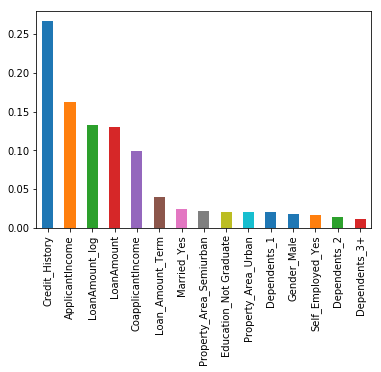

In [298]:
feature_imp.sort_values(ascending=False).plot(kind='bar');